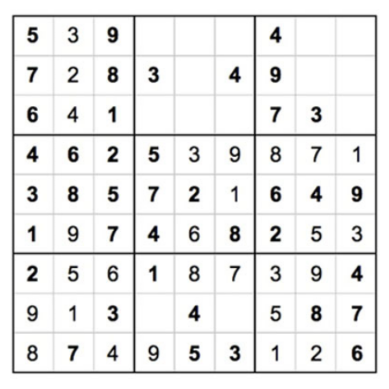

In [236]:
import cv2
from matplotlib import pyplot as plt

# Path to the image file
imgfile = 'static/uploads/2.png'
imgwidth = 450
imgheight = 450
# Read the image
image = cv2.imread(imgfile)
image = cv2.resize(image, (imgwidth, imgheight))  # RESIZE IMAGE TO MAKE IT A SQUARE IMAGE


# Convert the BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imageoriginal = image_rgb.copy()
imageoriginal2 = image_rgb.copy()

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()


# convert the image into Grayscale

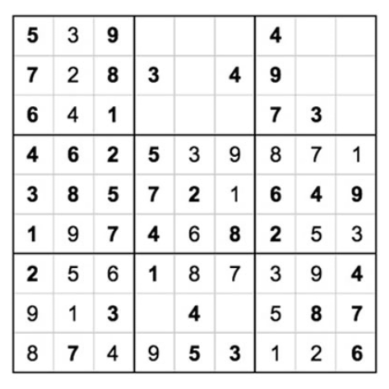

In [260]:
imgGray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(imgGray, cmap='gray')
plt.axis('off') 
plt.show()

# Add gaussian blur to the image

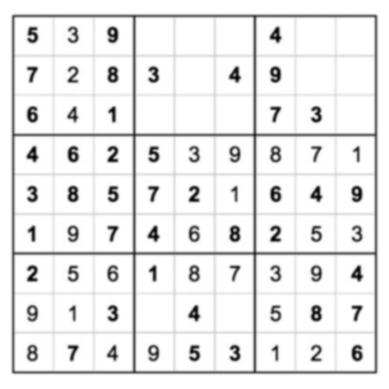

In [261]:
imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1) 
plt.imshow(imgBlur, cmap='gray')
plt.axis('off') 
plt.show()

# Apply adaptive threshold to the image

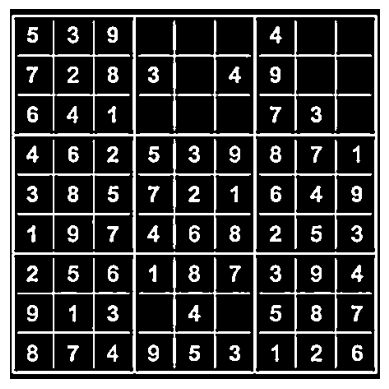

In [273]:
imgThreshold = cv2.adaptiveThreshold(imgBlur, 255, 1, 1, 11, 3)
plt.imshow(imgThreshold, cmap='gray')
plt.axis('off') 
plt.show()

# Find contours

In [274]:
contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours

(array([[[  3,   7]],
 
        [[  2,   8]],
 
        [[  2, 152]],
 
        [[  3, 153]],
 
        [[  2, 154]],
 
        [[  2, 296]],
 
        [[  3, 297]],
 
        [[  2, 298]],
 
        [[  2, 442]],
 
        [[  3, 442]],
 
        [[  4, 443]],
 
        [[149, 443]],
 
        [[150, 442]],
 
        [[152, 442]],
 
        [[153, 443]],
 
        [[295, 443]],
 
        [[296, 442]],
 
        [[298, 442]],
 
        [[299, 443]],
 
        [[445, 443]],
 
        [[446, 442]],
 
        [[446,   8]],
 
        [[445,   7]]], dtype=int32),)

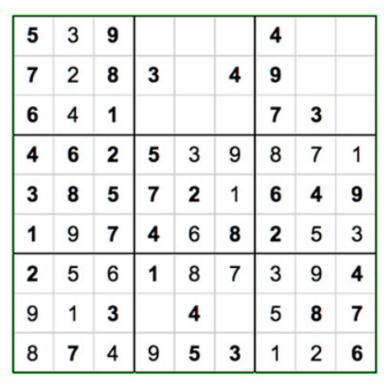

In [275]:

cv2.drawContours(imageoriginal, contours, -1, (0, 255, 0), 1)
imgContours = cv2.cvtColor(imageoriginal, cv2.COLOR_BGR2RGB)

# Display the image with contours
plt.imshow(imgContours)
plt.axis('off')
plt.show()

# find the biggest contour in the image

In [276]:
import numpy as np

biggest = np.array([])
max_area = 0
for i in contours:
    area = cv2.contourArea(i)
    if area > 50:
        peri = cv2.arcLength(i, True)
        approx = cv2.approxPolyDP(i, 0.02 * peri, True)
        if area > max_area and len(approx) == 4:
            biggest = approx
            max_area = area
biggest

array([[[  2,   8]],

       [[  2, 442]],

       [[446, 442]],

       [[445,   7]]], dtype=int32)

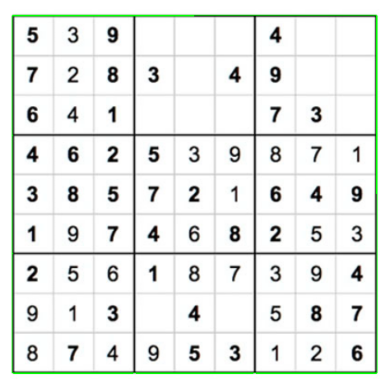

In [277]:
cv2.drawContours(imgContours, [biggest], -1, (0, 255, 0),1) # DRAW THE BIGGEST CONTOUR
cv2.cvtColor(imgContours, cv2.COLOR_BGR2RGB)


# Display the image with contours
plt.imshow(imgContours)
plt.axis('off')
plt.show()

In [278]:
rows = np.vsplit(imgContours,9)
boxes=[]
for r in rows:
    cols= np.hsplit(r,9)
    for box in cols:
        boxes.append(box)

boxes

[array([[[254, 254, 254],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [253, 253, 253],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [252, 252, 252],
         [253, 253, 253],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[254, 254, 254],
         [248, 248, 248],
         [  0, 255,   0],
         ...,
         [255, 255, 255],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[254, 254, 254],
         [248, 248, 248],
         [  0, 255,   0],
         ...,
         [255, 255, 255],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[254, 254, 254],
         [248, 248, 248],
         [  0, 255,   0],
         ...,
         [255, 255, 255],
  

In [279]:
height, width, channels = imgContours.shape
print("Image size: {}x{}x{}".format(width, height, channels))

Image size: 450x450x3


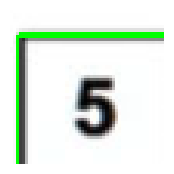

1/1 [==============================] - 0s 74ms/step
predictions  =   [[5.21183766e-16 1.46462058e-04 3.61280277e-11 7.90065658e-13
  1.05463654e-01 3.43791967e-10 8.94389868e-01 1.38177792e-18
  2.74352319e-09 3.40931408e-20]]
classindex  =   6
probabilityvalue  =   0.89438987


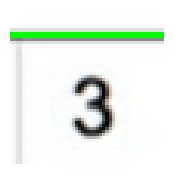

1/1 [==============================] - 0s 25ms/step
predictions  =   [[3.2103547e-16 2.0977314e-11 7.3547058e-19 1.1637871e-09 1.2637219e-06
  2.6556497e-04 9.9973315e-01 2.8957532e-20 3.0981845e-10 2.1097988e-17]]
classindex  =   6
probabilityvalue  =   0.99973315


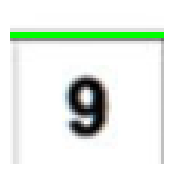

1/1 [==============================] - 0s 24ms/step
predictions  =   [[9.4939079e-17 9.7853100e-16 5.2308889e-24 8.7684277e-10 8.1575502e-07
  1.3964659e-07 9.9999905e-01 1.8795991e-19 7.7318950e-11 2.1347128e-19]]
classindex  =   6
probabilityvalue  =   0.99999905


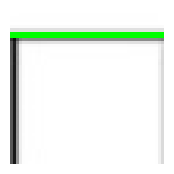

1/1 [==============================] - 0s 33ms/step
predictions  =   [[8.9881593e-14 7.0758015e-14 6.4115211e-16 4.5625730e-12 8.0860369e-20
  3.2130880e-15 1.7956678e-22 1.0000000e+00 5.8675307e-19 5.8579676e-16]]
classindex  =   7
probabilityvalue  =   1.0


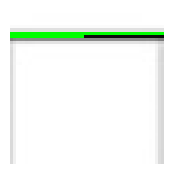

1/1 [==============================] - 0s 25ms/step
predictions  =   [[4.9221538e-15 2.7363740e-15 1.7963780e-17 3.9940311e-13 8.9664117e-22
  1.7319157e-16 1.4557565e-24 1.0000000e+00 8.4882924e-21 1.0009837e-17]]
classindex  =   7
probabilityvalue  =   1.0


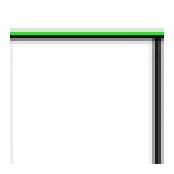

1/1 [==============================] - 0s 24ms/step
predictions  =   [[2.21231652e-16 1.38546784e-16 5.24155403e-19 2.17453314e-14
  1.04124835e-23 2.52660974e-18 6.41393143e-27 1.00000000e+00
  1.17108269e-22 4.76499408e-19]]
classindex  =   7
probabilityvalue  =   1.0


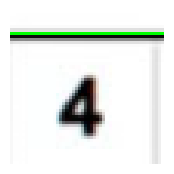

1/1 [==============================] - 0s 25ms/step
predictions  =   [[1.0923621e-07 5.6454676e-01 1.4306828e-04 8.3660956e-07 3.6485553e-02
  1.4516959e-06 1.8384721e-02 3.8027954e-01 1.5791001e-04 2.1271837e-14]]
classindex  =   1
probabilityvalue  =   0.56454676


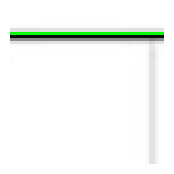

1/1 [==============================] - 0s 24ms/step
predictions  =   [[2.2284010e-16 1.3929825e-16 5.2830671e-19 2.2335349e-14 1.0420033e-23
  2.6617791e-18 6.6157650e-27 1.0000000e+00 1.2035050e-22 4.7488258e-19]]
classindex  =   7
probabilityvalue  =   1.0


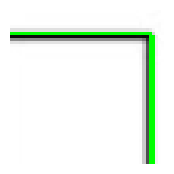

1/1 [==============================] - 0s 76ms/step
predictions  =   [[2.1815516e-16 1.8078110e-16 6.2843362e-19 2.8695681e-14 1.3832766e-23
  3.4832882e-18 7.9286129e-27 1.0000000e+00 1.0243279e-22 4.4312412e-19]]
classindex  =   7
probabilityvalue  =   1.0


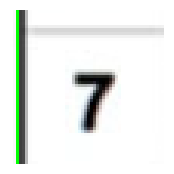

1/1 [==============================] - 0s 32ms/step
predictions  =   [[5.5377388e-13 7.0214234e-08 2.0799522e-11 4.9564948e-09 1.0175818e-03
  2.7432427e-01 7.2465718e-01 1.8345254e-19 9.9557428e-07 3.6948939e-09]]
classindex  =   6
probabilityvalue  =   0.7246572


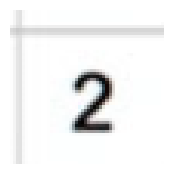

1/1 [==============================] - 0s 24ms/step
predictions  =   [[6.9710171e-16 5.4171456e-10 3.3943619e-14 1.1890772e-13 2.3851005e-06
  6.9689895e-07 9.9999690e-01 5.0519874e-31 3.6140910e-15 5.7676551e-17]]
classindex  =   6
probabilityvalue  =   0.9999969


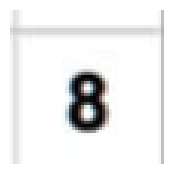

1/1 [==============================] - 0s 32ms/step
predictions  =   [[2.4389231e-21 3.0360910e-19 2.6621122e-27 1.3292350e-29 1.4850017e-12
  4.2471390e-18 1.0000000e+00 1.2212729e-38 4.0217699e-18 1.8853085e-28]]
classindex  =   6
probabilityvalue  =   1.0


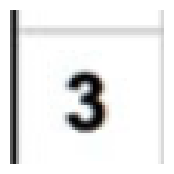

1/1 [==============================] - 0s 33ms/step
predictions  =   [[2.7490161e-19 4.7159342e-14 2.1277077e-17 8.0394210e-16 1.4639629e-07
  1.9491648e-05 9.9998033e-01 4.0128217e-31 7.5025008e-09 5.3192061e-17]]
classindex  =   6
probabilityvalue  =   0.99998033


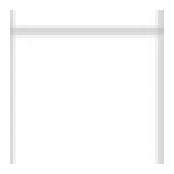

1/1 [==============================] - 0s 24ms/step
predictions  =   [[0.09901872 0.135827   0.06648122 0.1089403  0.07190143 0.06933172
  0.04596376 0.2630316  0.07143288 0.06807134]]
classindex  =   7
probabilityvalue  =   0.2630316


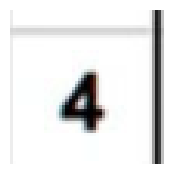

1/1 [==============================] - 0s 24ms/step
predictions  =   [[3.2784916e-16 4.9325263e-13 2.3309693e-17 1.4007586e-18 9.9994504e-01
  1.6414187e-17 1.1803515e-05 1.9758487e-23 4.3156237e-05 4.1274174e-20]]
classindex  =   4
probabilityvalue  =   0.99994504


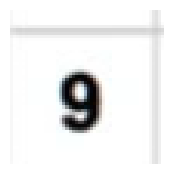

1/1 [==============================] - 0s 65ms/step
predictions  =   [[1.3749815e-20 2.9802852e-20 3.1810104e-31 1.5985712e-26 4.3330107e-07
  2.9320581e-14 9.9999952e-01 1.0689598e-34 2.9702751e-12 6.8267264e-21]]
classindex  =   6
probabilityvalue  =   0.9999995


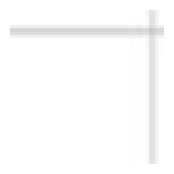

1/1 [==============================] - 0s 25ms/step
predictions  =   [[0.09933381 0.1350569  0.06656098 0.10929485 0.07091157 0.07010578
  0.04590616 0.26381984 0.0709545  0.06805562]]
classindex  =   7
probabilityvalue  =   0.26381984


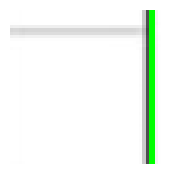

1/1 [==============================] - 0s 25ms/step
predictions  =   [[0.09339524 0.15028308 0.06982329 0.11812255 0.080577   0.0933677
  0.04680452 0.23946314 0.05068675 0.05747676]]
classindex  =   7
probabilityvalue  =   0.23946314


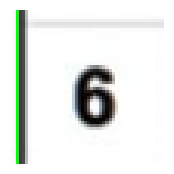

1/1 [==============================] - 0s 25ms/step
predictions  =   [[9.8503727e-16 7.6870065e-06 5.6330601e-15 2.7015702e-08 9.8674470e-01
  9.6259634e-10 1.2886341e-02 1.5503328e-21 3.6112487e-04 8.4070146e-15]]
classindex  =   4
probabilityvalue  =   0.9867447


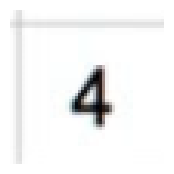

1/1 [==============================] - 0s 16ms/step
predictions  =   [[9.9049626e-18 1.2005702e-11 8.5939105e-16 1.4043345e-11 1.0000000e+00
  1.5029720e-14 9.2186292e-10 6.6147540e-20 1.4569786e-09 1.8335311e-14]]
classindex  =   4
probabilityvalue  =   1.0


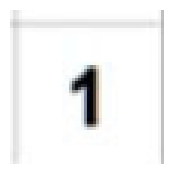

1/1 [==============================] - 0s 65ms/step
predictions  =   [[3.8532085e-17 6.7429687e-06 4.0484310e-17 1.2444037e-11 8.0702119e-03
  6.8230990e-09 4.3297259e-06 7.8047675e-19 9.9191874e-01 1.7795239e-10]]
classindex  =   8
probabilityvalue  =   0.99191874


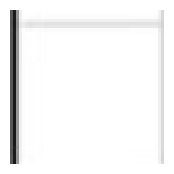

1/1 [==============================] - 0s 24ms/step
predictions  =   [[0.12599671 0.11387464 0.09860562 0.08124714 0.11876361 0.07882866
  0.1053014  0.08786805 0.09273177 0.09678239]]
classindex  =   0
probabilityvalue  =   0.12599671


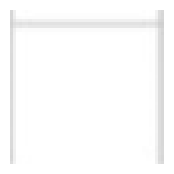

1/1 [==============================] - 0s 24ms/step
predictions  =   [[0.12666336 0.11421002 0.09838304 0.08103602 0.11959786 0.07784448
  0.10506299 0.08774735 0.09291413 0.0965407 ]]
classindex  =   0
probabilityvalue  =   0.12666336


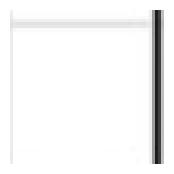

1/1 [==============================] - 0s 32ms/step
predictions  =   [[0.12634139 0.1141365  0.09821266 0.08111703 0.11955121 0.07799791
  0.10518529 0.08797795 0.09277435 0.09670569]]
classindex  =   0
probabilityvalue  =   0.12634139


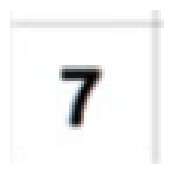

1/1 [==============================] - 0s 81ms/step
predictions  =   [[1.1222050e-15 8.2457268e-01 1.8724454e-11 1.0956635e-19 2.2808574e-10
  7.2193601e-12 2.4307557e-05 7.7323229e-17 1.7540301e-01 1.9191237e-08]]
classindex  =   1
probabilityvalue  =   0.8245727


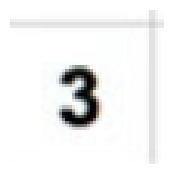

1/1 [==============================] - 0s 24ms/step
predictions  =   [[1.0789558e-18 6.0222682e-12 3.5407589e-17 1.5386171e-15 1.1417376e-05
  3.5597357e-06 5.2488558e-06 1.7589117e-24 9.9997973e-01 1.5696457e-08]]
classindex  =   8
probabilityvalue  =   0.99997973


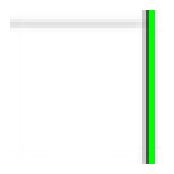

1/1 [==============================] - 0s 33ms/step
predictions  =   [[0.10998202 0.11267363 0.10472517 0.10186134 0.12291727 0.10028889
  0.09279179 0.08785448 0.07363407 0.09327139]]
classindex  =   4
probabilityvalue  =   0.12291727


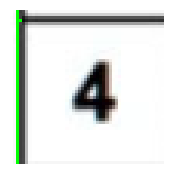

1/1 [==============================] - 0s 32ms/step
predictions  =   [[3.1291824e-19 2.1047779e-10 1.5146984e-19 5.8985611e-10 1.0000000e+00
  4.8363480e-16 3.1929309e-13 2.9510678e-18 6.0306409e-09 3.0687061e-11]]
classindex  =   4
probabilityvalue  =   1.0


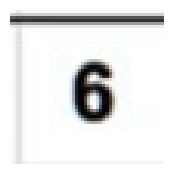

1/1 [==============================] - 0s 17ms/step
predictions  =   [[3.1477753e-16 3.6494212e-09 2.1742777e-17 7.6605907e-08 9.9995649e-01
  1.8116705e-09 1.0638919e-06 1.5297763e-19 4.2263197e-05 3.0689413e-11]]
classindex  =   4
probabilityvalue  =   0.9999565


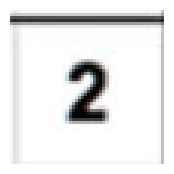

1/1 [==============================] - 0s 24ms/step
predictions  =   [[7.0934503e-14 4.5325952e-09 9.9982846e-01 3.6237716e-12 1.6819708e-04
  3.3276922e-06 2.3965048e-09 3.3178069e-20 1.6036064e-09 4.9237604e-11]]
classindex  =   2
probabilityvalue  =   0.99982846


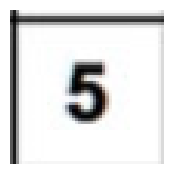

1/1 [==============================] - 0s 24ms/step
predictions  =   [[1.1691024e-17 4.9753449e-15 1.2526871e-15 4.2790180e-04 8.6792952e-01
  1.3108237e-01 2.0154114e-04 1.1187684e-20 3.3728333e-04 2.1420077e-05]]
classindex  =   4
probabilityvalue  =   0.8679295


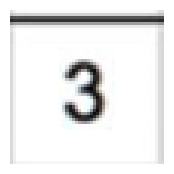

1/1 [==============================] - 0s 24ms/step
predictions  =   [[1.7911575e-11 2.7987723e-09 3.2442648e-07 2.1724936e-01 7.2298247e-01
  5.9595395e-02 4.8945054e-05 5.0298578e-15 9.1063972e-05 3.2357279e-05]]
classindex  =   4
probabilityvalue  =   0.72298247


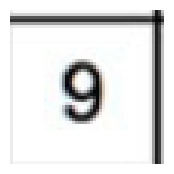

1/1 [==============================] - 0s 32ms/step
predictions  =   [[3.0499229e-16 6.2583965e-15 8.1211951e-19 4.6880823e-19 9.9993205e-01
  8.5901126e-09 7.3557267e-06 5.1650451e-25 8.7751768e-12 6.0608058e-05]]
classindex  =   4
probabilityvalue  =   0.99993205


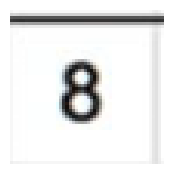

1/1 [==============================] - 0s 48ms/step
predictions  =   [[8.3405552e-14 7.1851476e-16 1.6607677e-22 5.5398616e-21 6.7045283e-01
  5.9830320e-13 3.0254078e-01 7.4073549e-22 2.7006393e-02 1.1435566e-11]]
classindex  =   4
probabilityvalue  =   0.67045283


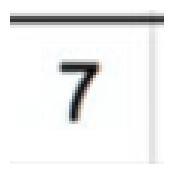

1/1 [==============================] - 0s 24ms/step
predictions  =   [[1.0117840e-10 9.9983740e-01 7.8514795e-09 1.9273547e-15 9.7078106e-09
  1.1567471e-12 3.7078575e-05 1.3011310e-09 1.2543352e-04 2.5417553e-08]]
classindex  =   1
probabilityvalue  =   0.9998374


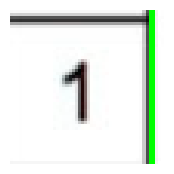

1/1 [==============================] - 0s 24ms/step
predictions  =   [[1.51773193e-07 8.17085564e-01 1.12556116e-08 1.10034334e-12
  3.70102050e-03 3.43638749e-05 1.53554894e-03 8.36561653e-11
  5.58094447e-03 1.72062412e-01]]
classindex  =   1
probabilityvalue  =   0.81708556


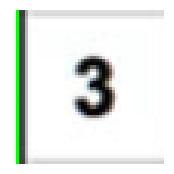

1/1 [==============================] - 0s 24ms/step
predictions  =   [[8.5802629e-21 3.4244928e-15 2.2230981e-13 9.9982089e-01 1.7915588e-04
  1.2635475e-11 1.2849589e-19 1.2511129e-15 1.2895235e-11 6.8298428e-10]]
classindex  =   3
probabilityvalue  =   0.9998209


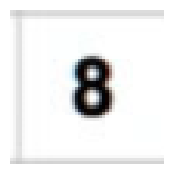

1/1 [==============================] - 0s 25ms/step
predictions  =   [[1.4333506e-15 2.7936169e-11 3.6692201e-15 3.6788392e-09 9.8490489e-01
  9.5962973e-13 4.2145120e-13 8.7946177e-15 1.5079056e-02 1.6092303e-05]]
classindex  =   4
probabilityvalue  =   0.9849049


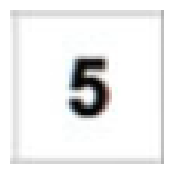

1/1 [==============================] - 0s 24ms/step
predictions  =   [[1.4918895e-21 2.8085010e-19 9.2643205e-19 2.6379425e-06 5.4008291e-07
  9.9999535e-01 1.3116731e-09 5.2634218e-22 1.8409914e-09 1.4208365e-06]]
classindex  =   5
probabilityvalue  =   0.99999535


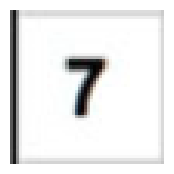

1/1 [==============================] - 0s 32ms/step
predictions  =   [[6.1966305e-16 9.9998581e-01 4.6303288e-08 1.0924402e-12 6.2670397e-10
  8.7753704e-14 8.2620123e-16 1.4219679e-05 3.0320454e-10 6.4292589e-09]]
classindex  =   1
probabilityvalue  =   0.9999858


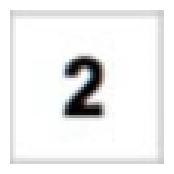

1/1 [==============================] - 0s 16ms/step
predictions  =   [[2.3351224e-13 5.1159122e-11 1.7277071e-03 5.1062724e-14 9.9825329e-01
  8.6685092e-16 4.8736633e-15 2.9290646e-11 1.9042531e-05 5.5940013e-13]]
classindex  =   4
probabilityvalue  =   0.9982533


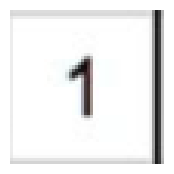

1/1 [==============================] - 0s 72ms/step
predictions  =   [[7.9793773e-13 2.0673621e-01 1.3622665e-11 5.0017029e-11 6.5796375e-02
  5.4526663e-06 6.0917040e-07 4.0235676e-11 7.2607231e-01 1.3891410e-03]]
classindex  =   8
probabilityvalue  =   0.7260723


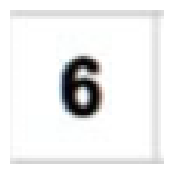

1/1 [==============================] - 0s 25ms/step
predictions  =   [[2.1526002e-14 7.4794047e-16 2.6253612e-21 7.5126203e-19 4.5830128e-01
  1.2485148e-07 5.4169494e-01 1.1197007e-20 3.5435633e-06 6.4655019e-08]]
classindex  =   6
probabilityvalue  =   0.54169494


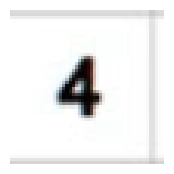

1/1 [==============================] - 0s 25ms/step
predictions  =   [[2.62624089e-22 1.01920108e-17 6.25573972e-31 7.92666027e-31
  1.00000000e+00 3.62108392e-23 1.13161355e-10 4.08274615e-28
  2.32757369e-10 1.91764139e-12]]
classindex  =   4
probabilityvalue  =   1.0


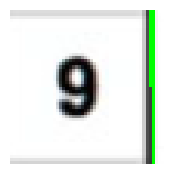

1/1 [==============================] - 0s 25ms/step
predictions  =   [[1.1954902e-17 2.2630747e-14 6.4259176e-22 2.5850969e-23 1.5402994e-01
  5.5226386e-11 3.1164113e-10 7.3211842e-21 2.0478441e-07 8.4596980e-01]]
classindex  =   9
probabilityvalue  =   0.8459698


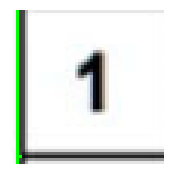

1/1 [==============================] - 0s 25ms/step
predictions  =   [[1.0189352e-06 5.1366709e-02 5.4753235e-07 8.2441531e-02 8.6469078e-01
  9.2012761e-04 8.5512295e-07 2.6468959e-07 4.4133387e-05 5.3399440e-04]]
classindex  =   4
probabilityvalue  =   0.8646908


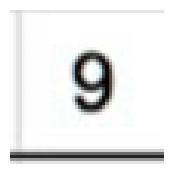

1/1 [==============================] - 0s 24ms/step
predictions  =   [[1.1322998e-18 5.5163103e-17 5.2710368e-16 3.7821418e-10 3.0754285e-10
  2.6909351e-12 4.4751176e-20 3.3186235e-16 5.7259157e-08 1.0000000e+00]]
classindex  =   9
probabilityvalue  =   1.0


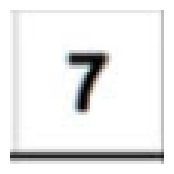

1/1 [==============================] - 0s 24ms/step
predictions  =   [[4.2279262e-17 9.9963892e-01 7.7874653e-13 3.0152245e-13 5.5232745e-14
  6.5618934e-17 1.5640173e-18 3.6102068e-04 2.1569399e-13 7.5111733e-10]]
classindex  =   1
probabilityvalue  =   0.9996389


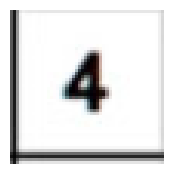

1/1 [==============================] - 0s 16ms/step
predictions  =   [[6.1721438e-21 1.3610424e-14 2.5277068e-27 5.4565420e-23 1.0000000e+00
  6.8519105e-20 9.9211295e-14 3.1055811e-24 9.7782130e-12 3.4953654e-08]]
classindex  =   4
probabilityvalue  =   1.0


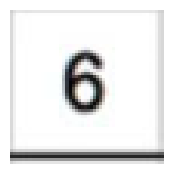

1/1 [==============================] - 0s 56ms/step
predictions  =   [[1.0071282e-13 4.9544730e-12 3.2095487e-20 2.8654698e-17 1.1827524e-01
  3.0423224e-02 8.4994519e-01 9.0237195e-19 5.9284620e-08 1.3562009e-03]]
classindex  =   6
probabilityvalue  =   0.8499452


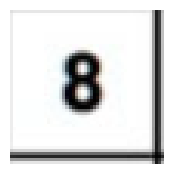

1/1 [==============================] - 0s 32ms/step
predictions  =   [[2.0536011e-15 4.5839287e-11 7.5466918e-21 8.9892509e-19 6.6560888e-01
  3.1371253e-11 5.0786166e-06 2.7447830e-16 6.6995528e-03 3.2768649e-01]]
classindex  =   4
probabilityvalue  =   0.6656089


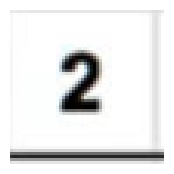

1/1 [==============================] - 0s 26ms/step
predictions  =   [[3.69635502e-13 1.10806095e-11 5.01391632e-14 2.08700991e-16
  9.99996066e-01 2.38905174e-20 4.66600445e-13 4.75849004e-12
  3.95716597e-06 4.30948477e-09]]
classindex  =   4
probabilityvalue  =   0.99999607


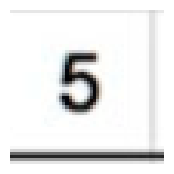

1/1 [==============================] - 0s 28ms/step
predictions  =   [[7.9657278e-18 6.3672249e-12 1.3049011e-18 3.0779946e-17 4.6218047e-04
  7.4675179e-01 3.2892956e-05 1.5924004e-19 1.0854297e-08 2.5275311e-01]]
classindex  =   5
probabilityvalue  =   0.7467518


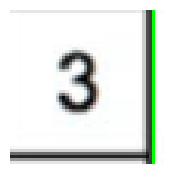

1/1 [==============================] - 0s 24ms/step
predictions  =   [[1.4519159e-15 7.6087048e-10 7.8710103e-14 1.8319359e-10 2.6277691e-02
  1.3978398e-07 5.0760337e-11 9.6393000e-13 2.5907495e-08 9.7372222e-01]]
classindex  =   9
probabilityvalue  =   0.9737222


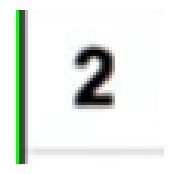

1/1 [==============================] - 0s 16ms/step
predictions  =   [[9.2312347e-12 7.6028590e-07 1.3766441e-07 3.4372061e-02 9.3049329e-04
  4.4046090e-13 1.1455315e-17 9.6466100e-01 2.4853805e-06 3.3073335e-05]]
classindex  =   7
probabilityvalue  =   0.964661


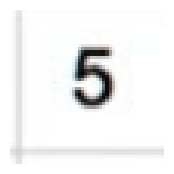

1/1 [==============================] - 0s 32ms/step
predictions  =   [[2.5818564e-15 8.7996901e-11 3.6356815e-17 3.9770260e-08 3.4857187e-03
  3.9657932e-02 1.7367156e-11 9.9949172e-13 2.7068054e-07 9.5685607e-01]]
classindex  =   9
probabilityvalue  =   0.9568561


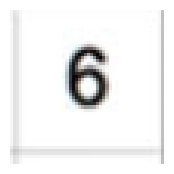

1/1 [==============================] - 0s 25ms/step
predictions  =   [[3.1848984e-16 6.7710247e-13 5.2687709e-22 8.7256013e-20 4.9452519e-06
  6.0388247e-06 6.7263635e-08 7.2591297e-19 4.8394809e-11 9.9998891e-01]]
classindex  =   9
probabilityvalue  =   0.9999889


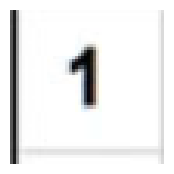

1/1 [==============================] - 0s 33ms/step
predictions  =   [[1.8890531e-16 9.9705017e-01 1.8407193e-13 1.4787534e-11 5.3497873e-09
  5.0826712e-09 1.0058358e-13 5.6971053e-11 1.7655024e-05 2.9321481e-03]]
classindex  =   1
probabilityvalue  =   0.99705017


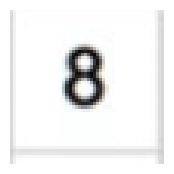

1/1 [==============================] - 0s 24ms/step
predictions  =   [[1.1884496e-18 5.6111769e-14 2.1857650e-21 9.1331745e-20 1.7257902e-05
  2.7293411e-12 2.8072922e-12 1.8590055e-17 2.6148491e-11 9.9998271e-01]]
classindex  =   9
probabilityvalue  =   0.9999827


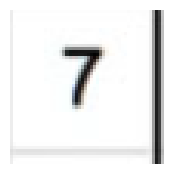

1/1 [==============================] - 0s 33ms/step
predictions  =   [[9.5766834e-09 1.2285910e-03 4.3559808e-14 3.3635226e-12 5.4874607e-09
  6.1931460e-16 3.5604888e-13 9.9738210e-01 5.4320827e-12 1.3892900e-03]]
classindex  =   7
probabilityvalue  =   0.9973821


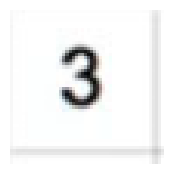

1/1 [==============================] - 0s 33ms/step
predictions  =   [[1.1935602e-20 2.2181888e-10 8.8642858e-18 1.1248996e-14 6.6351378e-05
  7.9750675e-13 6.1205940e-15 1.3591317e-13 4.2489116e-12 9.9993360e-01]]
classindex  =   9
probabilityvalue  =   0.9999336


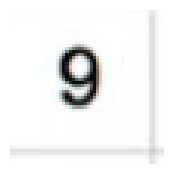

1/1 [==============================] - 0s 25ms/step
predictions  =   [[5.7882363e-25 1.7002383e-13 5.6972431e-23 4.7967678e-25 1.1127505e-14
  7.6524728e-18 5.9949030e-21 8.9551743e-20 5.2373799e-14 1.0000000e+00]]
classindex  =   9
probabilityvalue  =   1.0


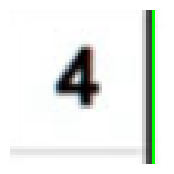

1/1 [==============================] - 0s 24ms/step
predictions  =   [[4.6538273e-18 5.4498326e-09 1.2491804e-21 2.7634979e-22 3.6974493e-02
  5.1187013e-11 5.6853094e-10 3.5140672e-21 1.6910946e-07 9.6302539e-01]]
classindex  =   9
probabilityvalue  =   0.9630254


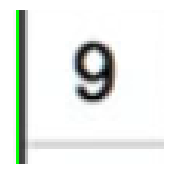

1/1 [==============================] - 0s 24ms/step
predictions  =   [[3.5455271e-21 9.1455438e-18 6.3839608e-18 1.2112442e-12 4.6273895e-13
  3.0362143e-14 1.8811609e-23 1.2957750e-16 3.9138728e-10 1.0000000e+00]]
classindex  =   9
probabilityvalue  =   1.0


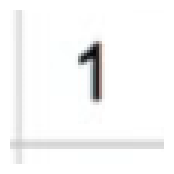

1/1 [==============================] - 0s 73ms/step
predictions  =   [[3.1159090e-08 9.9999321e-01 3.8769464e-08 4.5285738e-08 1.9314285e-10
  3.7380552e-09 1.8819994e-11 2.5187134e-07 7.7335355e-10 6.4451856e-06]]
classindex  =   1
probabilityvalue  =   0.9999932


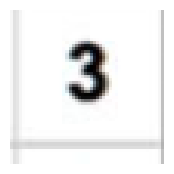

1/1 [==============================] - 0s 16ms/step
predictions  =   [[5.5276467e-17 1.5011244e-11 6.2519053e-15 1.5352138e-11 5.2799700e-05
  7.9647476e-13 2.6468586e-16 2.3714686e-10 6.3224231e-13 9.9994719e-01]]
classindex  =   9
probabilityvalue  =   0.9999472


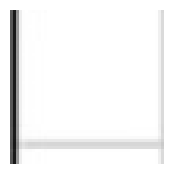

1/1 [==============================] - 0s 24ms/step
predictions  =   [[0.10937081 0.20419507 0.12429363 0.05320457 0.1306294  0.05442448
  0.09398379 0.04561563 0.09387872 0.0904038 ]]
classindex  =   1
probabilityvalue  =   0.20419507


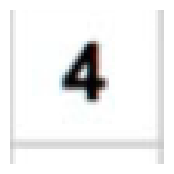

1/1 [==============================] - 0s 24ms/step
predictions  =   [[4.6183938e-18 2.6132523e-09 3.0045367e-17 7.7792199e-16 3.2558196e-09
  3.4725565e-06 2.0659841e-12 7.5643258e-19 2.5586169e-07 9.9999630e-01]]
classindex  =   9
probabilityvalue  =   0.9999963


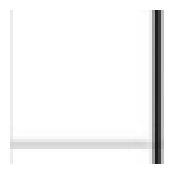

1/1 [==============================] - 0s 32ms/step
predictions  =   [[0.10913795 0.20582181 0.12341689 0.05336739 0.13035917 0.05400392
  0.09406671 0.04558028 0.0938907  0.09035521]]
classindex  =   1
probabilityvalue  =   0.20582181


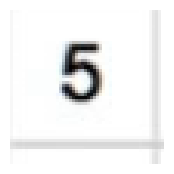

1/1 [==============================] - 0s 49ms/step
predictions  =   [[1.8914654e-21 1.2870241e-13 1.3048653e-17 1.9912919e-17 8.6205582e-06
  7.2725374e-11 6.5543489e-17 8.5369640e-13 3.2112354e-11 9.9999142e-01]]
classindex  =   9
probabilityvalue  =   0.9999914


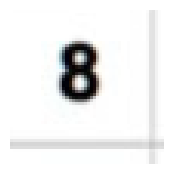

1/1 [==============================] - 0s 25ms/step
predictions  =   [[4.0120867e-25 2.4016391e-16 3.7969576e-26 2.5669483e-24 1.3176276e-08
  2.4411806e-17 1.1248942e-19 9.7007875e-19 2.8376519e-14 1.0000000e+00]]
classindex  =   9
probabilityvalue  =   1.0


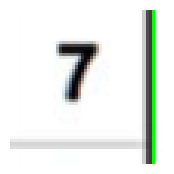

1/1 [==============================] - 0s 17ms/step
predictions  =   [[2.8257120e-06 7.9652920e-15 6.5481693e-16 3.6853201e-14 1.1686393e-06
  1.2163453e-17 1.5946894e-17 5.1589674e-01 1.9813458e-11 4.8409921e-01]]
classindex  =   7
probabilityvalue  =   0.51589674


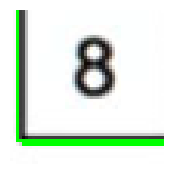

1/1 [==============================] - 0s 33ms/step
predictions  =   [[6.7079548e-14 6.1756427e-13 3.1118027e-08 1.1804954e-10 1.3667488e-12
  1.3387772e-13 3.6201088e-20 1.3349524e-13 7.2135155e-14 1.0000000e+00]]
classindex  =   9
probabilityvalue  =   1.0


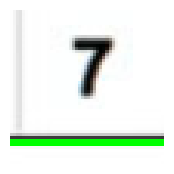

1/1 [==============================] - 0s 25ms/step
predictions  =   [[6.95864756e-15 2.16018841e-01 4.72970621e-12 1.11904126e-04
  1.38842212e-13 4.35560732e-15 4.08196022e-20 7.83869147e-01
  3.04282898e-14 1.14823585e-07]]
classindex  =   7
probabilityvalue  =   0.78386915


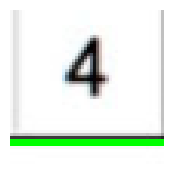

1/1 [==============================] - 0s 24ms/step
predictions  =   [[1.3274074e-17 5.5989082e-04 6.4411751e-09 8.3647438e-12 6.0046002e-10
  7.1350644e-07 3.8630151e-13 3.3550704e-19 6.5890774e-05 9.9937350e-01]]
classindex  =   9
probabilityvalue  =   0.9993735


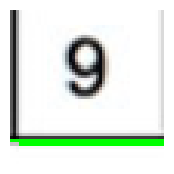

1/1 [==============================] - 0s 24ms/step
predictions  =   [[1.2082259e-20 2.8918290e-16 1.9379818e-09 5.2964094e-10 5.8566051e-12
  4.4666329e-16 6.6505638e-25 1.9961719e-14 2.2236513e-11 1.0000000e+00]]
classindex  =   9
probabilityvalue  =   1.0


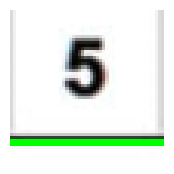

1/1 [==============================] - 0s 24ms/step
predictions  =   [[2.6201265e-16 6.4493705e-10 7.7926359e-08 1.2148512e-06 4.7193218e-11
  1.6360218e-05 1.5600894e-18 6.6872460e-08 6.8585103e-07 9.9998152e-01]]
classindex  =   9
probabilityvalue  =   0.9999815


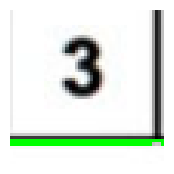

1/1 [==============================] - 0s 18ms/step
predictions  =   [[5.6101659e-19 1.8740853e-10 7.9844457e-11 3.2135691e-07 1.3636784e-08
  2.6159512e-11 6.0546555e-21 3.8980921e-10 6.8467954e-10 9.9999964e-01]]
classindex  =   9
probabilityvalue  =   0.99999964


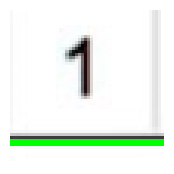

1/1 [==============================] - 0s 25ms/step
predictions  =   [[1.0239322e-10 9.9740595e-01 1.4946754e-06 1.2714066e-08 7.2212738e-09
  5.0660479e-11 3.3081895e-13 7.8832993e-09 1.4971379e-04 2.4427371e-03]]
classindex  =   1
probabilityvalue  =   0.99740595


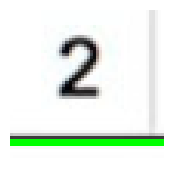

1/1 [==============================] - 0s 24ms/step
predictions  =   [[4.9142676e-16 8.3448902e-16 1.9293017e-13 3.3611778e-14 4.2869258e-03
  8.4142824e-17 1.9293704e-18 1.4445043e-12 2.8583087e-17 9.9571311e-01]]
classindex  =   9
probabilityvalue  =   0.9957131


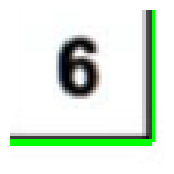

1/1 [==============================] - 0s 32ms/step
predictions  =   [[2.3243661e-25 1.1961403e-15 1.5687042e-20 1.5852186e-18 3.9301836e-16
  1.9314580e-12 6.7206760e-24 5.1473965e-18 1.6195545e-11 1.0000000e+00]]
classindex  =   9
probabilityvalue  =   1.0


[6,
 6,
 6,
 7,
 7,
 7,
 0,
 7,
 7,
 0,
 6,
 6,
 6,
 0,
 4,
 6,
 0,
 0,
 4,
 4,
 8,
 0,
 0,
 0,
 1,
 8,
 0,
 4,
 4,
 2,
 4,
 0,
 4,
 0,
 1,
 1,
 3,
 4,
 5,
 1,
 4,
 0,
 0,
 4,
 9,
 4,
 9,
 1,
 4,
 6,
 0,
 4,
 0,
 9,
 7,
 9,
 9,
 1,
 9,
 7,
 9,
 9,
 9,
 9,
 1,
 9,
 0,
 9,
 0,
 9,
 9,
 0,
 9,
 0,
 9,
 9,
 9,
 9,
 1,
 9,
 9]

In [284]:
from tensorflow.keras.models import load_model
model = load_model('model/trained_model.h5')

result = []
for image in boxes:
    ## PREPARE IMAGE
    img = np.asarray(image)
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    img = img[4:img.shape[0] - 4, 4:img.shape[1] -4]
    img = cv2.resize(img, (28, 28))
  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = img / 255
    img = img.reshape(1, 28, 28, 1)
    ## GET PREDICTION
    predictions = model.predict(img)
    classIndex = np.argmax(predictions)
    probabilityValue = np.amax(predictions)
    print("predictions  =  ",predictions)
    print("classindex  =  ",classIndex)
    print("probabilityvalue  =  ",probabilityValue)

    ## SAVE TO RESULT
    if probabilityValue > 0.8:
        result.append(classIndex)
    else:
        result.append(0)
result

In [247]:
numbers = np.asarray(result)
posArray = np.where(numbers > 0, 0, 1)
board = np.array_split(numbers,9)
board

[array([6, 6, 6, 7, 7, 7, 6, 7, 7], dtype=int64),
 array([0, 6, 6, 6, 0, 4, 6, 0, 0], dtype=int64),
 array([4, 4, 8, 0, 0, 0, 1, 8, 0], dtype=int64),
 array([4, 4, 2, 4, 0, 4, 0, 1, 1], dtype=int64),
 array([3, 4, 5, 1, 4, 0, 0, 4, 9], dtype=int64),
 array([4, 9, 1, 4, 6, 0, 4, 0, 9], dtype=int64),
 array([7, 9, 9, 1, 9, 7, 9, 9, 9], dtype=int64),
 array([9, 1, 9, 0, 9, 0, 9, 9, 0], dtype=int64),
 array([9, 7, 9, 9, 9, 9, 1, 9, 9], dtype=int64)]

In [248]:
board

[array([6, 6, 6, 7, 7, 7, 6, 7, 7], dtype=int64),
 array([0, 6, 6, 6, 0, 4, 6, 0, 0], dtype=int64),
 array([4, 4, 8, 0, 0, 0, 1, 8, 0], dtype=int64),
 array([4, 4, 2, 4, 0, 4, 0, 1, 1], dtype=int64),
 array([3, 4, 5, 1, 4, 0, 0, 4, 9], dtype=int64),
 array([4, 9, 1, 4, 6, 0, 4, 0, 9], dtype=int64),
 array([7, 9, 9, 1, 9, 7, 9, 9, 9], dtype=int64),
 array([9, 1, 9, 0, 9, 0, 9, 9, 0], dtype=int64),
 array([9, 7, 9, 9, 9, 9, 1, 9, 9], dtype=int64)]

In [249]:
bo =board

def solve(bo):
    find = find_empty(bo)
    if not find:
        return True
    else:
        row, col = find
    for i in range(1,10):
        if valid(bo, i, (row, col)):
            bo[row][col] = i
            if solve(bo):
                return True
            bo[row][col] = 0
    return False
    

def valid(bo, num, pos):
  
    # Check row
    for i in range(len(bo[0])):
        if bo[pos[0]][i] == num and pos[1] != i:
            return False
    # Check column
    for i in range(len(bo)):
        if bo[i][pos[1]] == num and pos[0] != i:
            return False
    # Check box
    box_x = pos[1] // 3
    box_y = pos[0] // 3
    for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x * 3, box_x*3 + 3):
            if bo[i][j] == num and (i,j) != pos:
                return False
    return True

def find_empty(bo):
    for i in range(len(bo)):
        for j in range(len(bo[0])):
            if bo[i][j] == 0:
                return (i, j)  # row, col
    return None

solve(bo)
board

[array([6, 6, 6, 7, 7, 7, 6, 7, 7], dtype=int64),
 array([0, 6, 6, 6, 0, 4, 6, 0, 0], dtype=int64),
 array([4, 4, 8, 0, 0, 0, 1, 8, 0], dtype=int64),
 array([4, 4, 2, 4, 0, 4, 0, 1, 1], dtype=int64),
 array([3, 4, 5, 1, 4, 0, 0, 4, 9], dtype=int64),
 array([4, 9, 1, 4, 6, 0, 4, 0, 9], dtype=int64),
 array([7, 9, 9, 1, 9, 7, 9, 9, 9], dtype=int64),
 array([9, 1, 9, 0, 9, 0, 9, 9, 0], dtype=int64),
 array([9, 7, 9, 9, 9, 9, 1, 9, 9], dtype=int64)]

In [250]:
flatList = []
for sublist in board:
    for item in sublist:
        flatList.append(item)
solvedNumbers =flatList*posArray
solvedNumbers

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

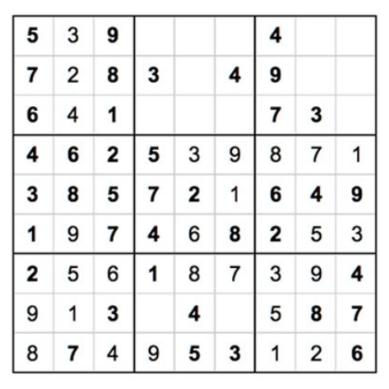

In [251]:


ImageWithDigits= imgblank2.copy()
color = (0,2550,0)
secW = int(ImageWithDigits.shape[1]/9)
secH = int(ImageWithDigits.shape[0]/9)
for x in range (0,9):
    for y in range (0,9):
        if solvedNumbers[(y*9)+x] != 0 :
            cv2.putText(ImageWithDigits, str(solvedNumbers[(y*9)+x]),
                        (x*secW+int(secW/2)-10, int((y+0.8)*secH)), cv2.FONT_HERSHEY_COMPLEX_SMALL,
                        2, color, 1, cv2.LINE_AA)
            
plt.imshow(ImageWithDigits)
plt.axis('off')
plt.show()